In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
import os

In [4]:
lenses = pd.read_csv("/content/lenses.data",sep='\s+',header=None)
lenses.rename(columns={0:'id',1:'age',2:'perscription',3:'astigmatic', 4:'tears',5:'lenses'}, inplace=True)
lenses.head(5)

,id,age,perscription,astigmatic,tears,lenses
0,1,1,1,1,1,3
1,2,1,1,1,2,2
2,3,1,1,2,1,3
3,4,1,1,2,2,1
4,5,1,2,1,1,3


In [5]:
X = lenses.drop(["lenses","id"], axis=1).values
Y = lenses["lenses"].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [6]:
num_classes = len(lenses["lenses"].unique())
num_classes

3

In [7]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion="gini") 
history1 = tree.fit(X_train, Y_train)

y_pred_train = tree.predict(X_train)
y_pred = tree.predict(X_test)

dt_accuracy_train = accuracy_score(Y_train, y_pred_train)
dt_accuracy_test = accuracy_score(Y_test, y_pred)

print("Accuracy: Train=%.4f Test=%.4f" % (dt_accuracy_train,dt_accuracy_test))

Accuracy: Train=1.0000 Test=0.8750


In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
history2 = knn.fit(X_train, Y_train)

y_pred_train = knn.predict(X_train)
y_pred = knn.predict(X_test)

knn_accuracy_train = accuracy_score(Y_train, y_pred_train)
knn_accuracy_test = accuracy_score(Y_test, y_pred)

print("Accuracy: Train=%.4f Test=%.4f" % (knn_accuracy_train,knn_accuracy_test))

Accuracy: Train=0.8125 Test=0.8750


In [9]:
X = lenses.drop(["lenses","id"], axis=1)
Y = pd.get_dummies(lenses['lenses']) # Convert the categorical target variable into one-hot encoded vectors


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [10]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history3 = model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_test, Y_test))

accuracy = model.evaluate(X_test, Y_test)
print('Accuracy: %.2f' % (accuracy[1]*100))


Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 1.4981 - accuracy: 0.1875 - val_loss: 1.7243 - val_accuracy: 0.1250
Epoch 2/10
1/1 [==============================] - 0s 67ms/step - loss: 1.4807 - accuracy: 0.1875 - val_loss: 1.7015 - val_accuracy: 0.1250
Epoch 3/10
1/1 [==============================] - 0s 53ms/step - loss: 1.4637 - accuracy: 0.1875 - val_loss: 1.6788 - val_accuracy: 0.1250
Epoch 4/10
1/1 [==============================] - 0s 52ms/step - loss: 1.4470 - accuracy: 0.1875 - val_loss: 1.6563 - val_accuracy: 0.1250
Epoch 5/10
1/1 [==============================] - 0s 65ms/step - loss: 1.4307 - accuracy: 0.1875 - val_loss: 1.6342 - val_accuracy: 0.1250
Epoch 6/10
1/1 [==============================] - 0s 48ms/step - loss: 1.4148 - accuracy: 0.1875 - val_loss: 1.6125 - val_accuracy: 0.1250
Epoch 7/10
1/1 [==============================] - 0s 41ms/step - loss: 1.3994 - accuracy: 0.1875 - val_loss: 1.5911 - val_accuracy: 0.1250
Epoch 8/10
1/1 [=============

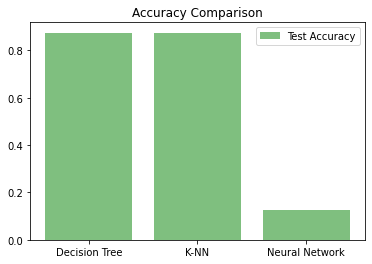

In [11]:
import matplotlib.pyplot as plt


nn_acc_train = history3.history['accuracy'][-1]
nn_acc_test = accuracy[1]

models = ['Decision Tree', 'K-NN', 'Neural Network']
accuracy_test = [dt_accuracy_test, knn_accuracy_test, nn_acc_test]

plt.bar(models, accuracy_test, color='green', alpha=0.5)
plt.legend([ 'Test Accuracy'])
plt.title('Accuracy Comparison')
plt.show()
